<a href="https://colab.research.google.com/github/jsdae90/2019_Weather_Competition/blob/master/word2vec_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/supportchelsea/Weather-Competition.git

fatal: destination path 'Weather-Competition' already exists and is not an empty directory.


In [2]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Jul  3 16:14 sample_data/
drwxr-xr-x 5 root root 4096 Jul 16 04:05 Weather-Competition/


In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [3]:
!pip install konlpy
!pip install customized_konlpy

In [0]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from gensim.models import word2vec

In [0]:
import pandas as pd
import numpy as np

import os

In [111]:
categories = {'네일' : ['네일', '세일'], '립컬러' : ['틴트', '립스틱','립무스', '립펜슬' ], '립케어' : ['립오일','립밤','립글로즈'], '마스크팩':['마스크팩'], '바디로션':['바디로션'], '선케어':['선크림','선스틱','선쿠션','썬크림','썬스틱','썬쿠션'], '제모제':['제모제', '왁싱패치', '제모크림', '왁스스트립'], '체중조절':['체중조절', '다이어트간식' , '다이어트바'], '크림로션':['스킨', '토너', '로션', '에센스','수분크림'], '훼이셜클렌저':['클렌징', '아이리무버', '클렌저']}
categories = [j for i in categories.values() for j in i]

twitter = Twitter()
twitter.add_dictionary(categories, 'Noun')
twitter.add_dictionary(['아이소이', '브라이트닝', '닥터림스', '알로에', '네이처 리퍼블릭'], 'Noun')

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [112]:
path = 'Weather-Competition/sns data/'
os.listdir(path)

['mask_2018.csv',
 'lalavla_2018.csv',
 'nail_2018.csv',
 'creamlotion_2018.csv',
 'diet_2018.csv',
 'lipcare_2018.csv',
 'cleanser_2018.csv',
 'hairremoval_2018.csv',
 'lipcolor_2018.csv',
 'bodylotion_2018.csv',
 'suncare_2018.csv']

In [0]:
suncare= pd.read_csv(path+'suncare_2018.csv').iloc[:, 1:]
# suncare = suncare.fillna('')

In [0]:
suncare.columns = [str(i)[:7] for i in suncare.columns]

In [0]:
suncare = suncare[['2018-01', '2018-02']]
suncare.columns = [i for i in range(len(suncare.columns))]

In [0]:
list_corpus = []
for date in suncare.columns:
  
  for unit in suncare[date].dropna().tolist():
  
    unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus.append(temp_corpus)

In [0]:
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고']

cleaning_list_corpus = []
for corpus in list_corpus:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
item_list_clean = pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()[pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()>500/5].index

In [0]:
cleaning_list_corpus2 = []
for corpus in cleaning_list_corpus:
  temp_corpus = pd.Series(corpus)[pd.Series(corpus).isin(item_list_clean)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus2.append(temp_corpus)

In [132]:
word2vec_model = word2vec.Word2Vec(cleaning_list_corpus2, min_count=50/5)
word2vec_model.most_similar('썬크림', topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('피부관리', 0.8290514945983887),
 ('마스크팩', 0.8138600587844849),
 ('화장품', 0.8079842329025269),
 ('미스트', 0.8068873882293701),
 ('이벤트', 0.8067660331726074),
 ('스킨', 0.7524863481521606),
 ('크림', 0.5668295621871948),
 ('피부', 0.5639766454696655),
 ('화장', 0.47920748591423035),
 ('발라', 0.44545048475265503),
 ('로션', 0.38788357377052307),
 ('쿠션', 0.3796337842941284),
 ('얼굴', 0.30769479274749756),
 ('어요', 0.25592005252838135),
 ('틴트', 0.17237935960292816)]

In [133]:
X = word2vec_model[word2vec_model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

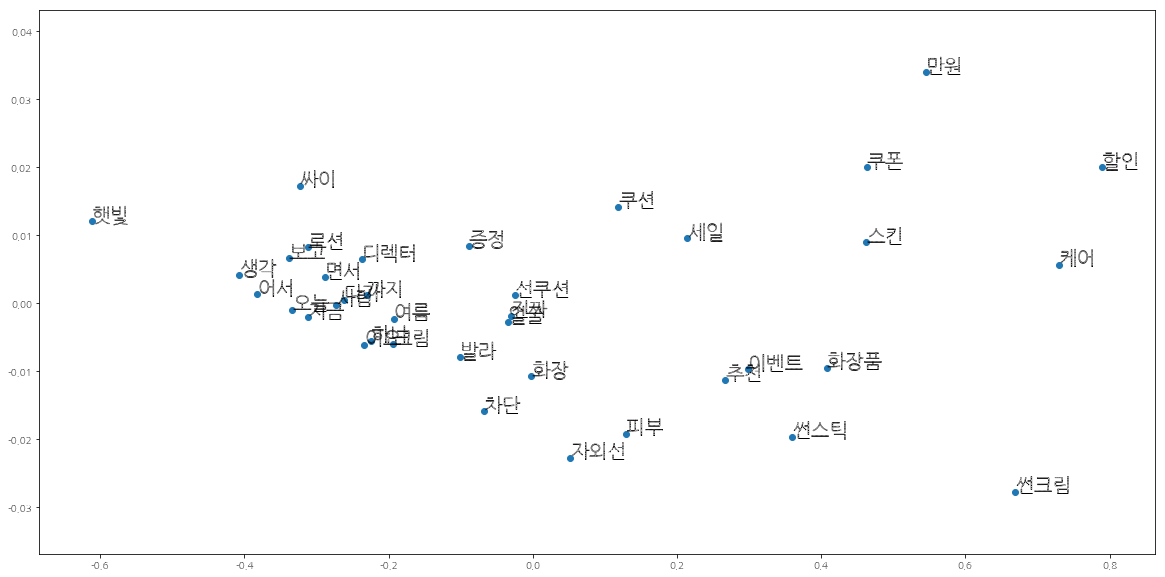

In [124]:
# 여름
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=20)
plt.show()

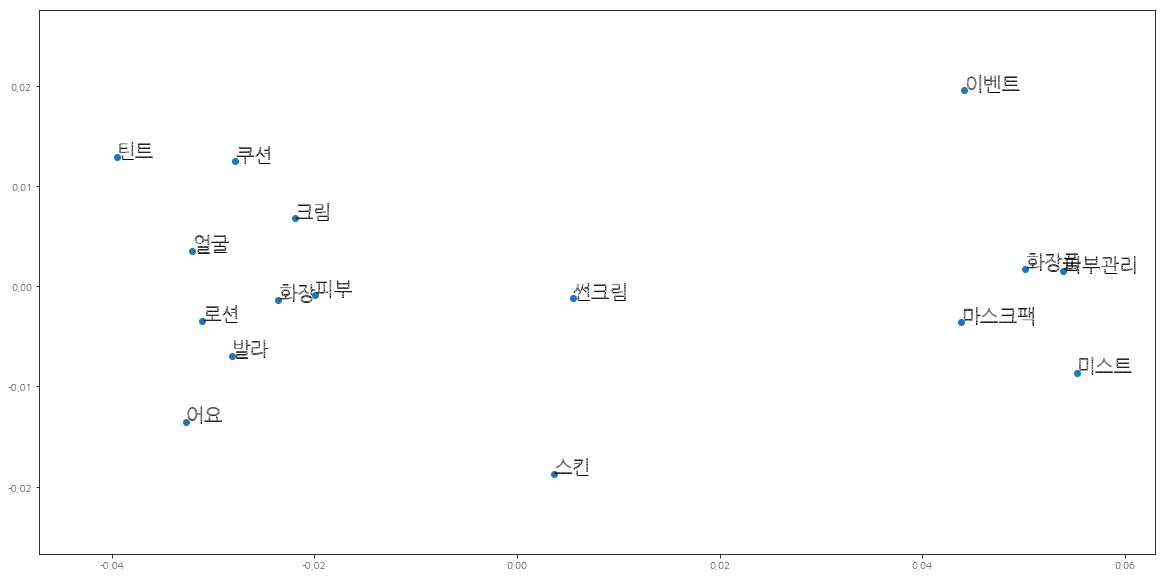

In [136]:
# 겨울
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=20)
plt.show()